<div>
<img img class="logo" src="https://www.cbs.dk/files/cbs.dk/cbslogo.png" style="width: 300px;" align="right">
</div>

# Exercise 01

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('./datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [4]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

<Axes: xlabel='Age', ylabel='Income'>

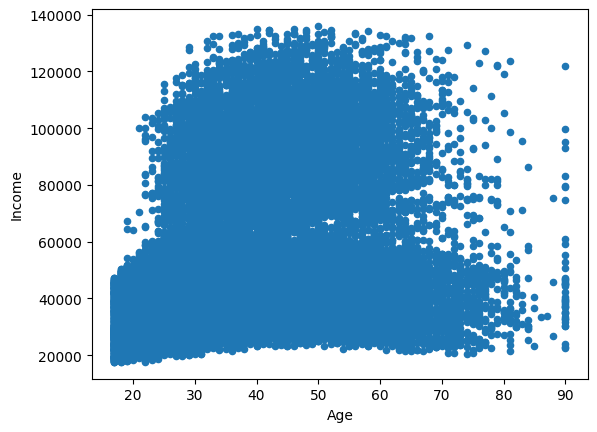

In [5]:
income.plot(x='Age', y='Income', kind='scatter')

In [7]:
income[['Age', 'Income']].isnull().sum()

Age       0
Income    0
dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression

# create X and y
X = income[['Age']].values
y = income['Income'].values

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [11]:
slope = model.coef_[0]
intercept = model.intercept_

In [19]:
# For a 1% increase in age, income increases by:
age_mean = np.mean(X)
income_mean = model.predict([[age_mean]])[0] # predicted income at mean age

In [18]:
# Predicted income for a 1% increase in Age
income_increase = model.predict([[age_mean * 1.01]])[0]

percentage_increase = (income_increase - income_mean) / income_mean * 100

In [17]:
# Predict the income for age 30 and 40
predicted_income_30 = model.predict([[30]])[0]
predicted_income_40 = model.predict([[40]])[0]

In [20]:
slope, intercept, percentage_increase, predicted_income_30, predicted_income_40

(np.float64(542.1676570723891),
 np.float64(32538.08813086857),
 np.float64(0.39130865955883776),
 np.float64(48803.11784304024),
 np.float64(54224.79441376414))

- For a 1% increase in age, the income increases by approximately **0.39%**.
- The predicted income for a 30-year-old is **$48,803.12**.
- The predicted income for a 40-year-old is **$54,224.79**.
- The linear regression model has a slope of **542.17**, meaning that for each additional year of age, the income increases by about **$542.17**.
- The intercept is **$32,538.09**, which represents the estimated income when age is zero.


# Exercise 03.2

Evaluate the model using the MSE

In [21]:
from sklearn.metrics import mean_squared_error

# Predict the incomes based on the model
y_pred = model.predict(X)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
mse


np.float64(593783043.8402297)


# Exercise 03.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [22]:
# Add a new feature for Age^2
income['Age_squared'] = income['Age'] ** 2

# Prepare the features and the target variable
X_ols = income[['Age', 'Age_squared']].values  # Features: Age and Age^2
y_ols = income['Income'].values  # Target: Income

# Calculate the OLS estimates manually
# X.T @ X and X.T @ y
X_ols_with_intercept = np.column_stack((np.ones(X_ols.shape[0]), X_ols))  # Add intercept (column of 1s)
beta_ols = np.linalg.inv(X_ols_with_intercept.T @ X_ols_with_intercept) @ (X_ols_with_intercept.T @ y_ols)

# Display the coefficients: intercept, Age coefficient, and Age^2 coefficient
beta_ols

array([-16225.07097408,   3131.77014151,    -30.54341041])

The coefficients of the regression model using Age and Age² as features are as follows:

- **Intercept**: -16,225.07
- **Age coefficient**: 3,131.77
- **Age² coefficient**: -30.54

This suggests the following equation for predicting income:

**Income = -16,225.07 + 3,131.77 × Age - 30.54 × Age²**

# Exercise 03.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [23]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age_squared
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [24]:
# Check for missing data
missing_data = income.isnull().sum()

# Display the missing data
print(missing_data)

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Income               0
Age_squared          0
dtype: int64


In [31]:
# Ensure all data is numeric by forcing conversion to float
# Check if there are any non-numeric values in the selected features

# Perform one-hot encoding for 'Martial Status' and 'Sex'
income_data_encoded = pd.get_dummies(income, columns=['Martial Status', 'Sex'], drop_first=True)

X_selected_features = income_data_encoded[['Age', 'Education-Num', 'Hours per week'] + 
                                          [col for col in income_data_encoded.columns if 'Martial Status_' in col or 'Sex_' in col]].values
y_selected_features = income_data_encoded['Income'].values

# Convert to float if needed
X_selected_features = X_selected_features.astype(np.float64)

# Add intercept (column of 1s)
X_selected_with_intercept = np.column_stack((np.ones(X_selected_features.shape[0]), X_selected_features))

# Perform the regression using OLS
beta_selected = np.linalg.inv(X_selected_with_intercept.T @ X_selected_with_intercept) @ (X_selected_with_intercept.T @ y_selected_features)

# Predict incomes using the model with selected features
y_pred_selected = X_selected_with_intercept @ beta_selected

# Calculate MSE for the selected feature model
mse_selected = mean_squared_error(y_selected_features, y_pred_selected)

# Return the coefficients and the MSE for the new model
beta_selected, mse_selected


(array([-19687.44128718,    289.72409423,   3807.86065155,    189.42776129,
         12350.74437647,  13423.09557789,   1154.7064806 ,  -1026.47701424,
          1151.90708125,  -1624.08874193,  15050.89732316]),
 np.float64(327429893.3909713))

Regression model using the features: Age, Education-Num, Martial Status, Sex, and Hours per week:

- **Intercept**: -19,687.44
- **Age coefficient**: 289.72
- **Education-Num coefficient**: 3,807.86
- **Hours per week coefficient**: 189.43
- Coefficients for various categories of Martial Status and Sex are also included.

### Model Performance:
- **MSE**: 327,429,893.39

The Mean Squared Error for this model is significantly lower compared to previous models, suggesting that this combination of features leads to a better prediction of income.
